<a href="https://colab.research.google.com/github/wanasyraf4/RUL_v2/blob/main/predictive_maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy



from google.colab import drive
from mpl_toolkits import mplot3d
from scipy.stats import skew
from scipy.stats import kurtosis

drive.mount('/content/drive/')

path = "/content/drive/My Drive/Colab Notebooks/sensordata/sensordata2.xlsx"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [83]:
path='/content/drive/My Drive/Colab Notebooks/sensordata/sensordata2.xlsx'
sensordata = pd.read_excel(path)

print(sensordata)

                     Time  MDL current  MDM current  MDH current  MDL speed  \
0     2020-08-16 00:00:00    30.000000    27.200001    27.000000  79.080002   
1     2020-08-16 00:01:00    30.000000    27.100000    27.200001  79.080002   
2     2020-08-16 00:02:00    30.000000    27.200001    27.200001  79.080002   
3     2020-08-16 00:03:00    29.900000    27.200001    27.200001  79.089996   
4     2020-08-16 00:04:00    30.000000    27.100000    27.200001  79.089996   
...                   ...          ...          ...          ...        ...   
21594 2020-08-30 23:54:00    29.600000    26.100000    28.400000  74.209999   
21595 2020-08-30 23:55:00    29.600000    26.100000    28.400000  74.239998   
21596 2020-08-30 23:56:00    29.500000    25.900000    28.299999  74.260002   
21597 2020-08-30 23:57:00    29.700001    26.000000    28.299999  74.269997   
21598 2020-08-30 23:58:00    29.500000    25.900000    28.400000  74.250000   

        MDM speed   MDH speed  MD-L torque  MD-M to

In [84]:
time = sensordata['Time']
current_MDL = sensordata['MDL current']
current_MDM = sensordata['MDM current']
current_MDH = sensordata['MDH current']

speed_MDL = sensordata['MDL speed']
speed_MDM = sensordata['MDM speed']
speed_MDH = sensordata['MDH speed']

torque_MDL = sensordata['MD-L torque']
torque_MDM = sensordata['MD-M torque']
torque_MDH = sensordata['MD-H torque']

Subplot all data over the database on sensor

Text(0.5, 1.0, 'MDH Current')

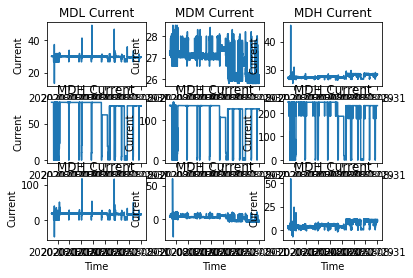

In [85]:
# current
plt.subplot(3, 3, 1)
plt.plot(time,current_MDL)
plt.xlabel('Time') 
plt.ylabel('Current') 
plt.title("MDL Current")

plt.subplot(3, 3, 2)
plt.plot(time,current_MDM)
plt.xlabel('Time') 
plt.ylabel('Current') 
plt.title("MDM Current")

plt.subplot(3, 3, 3)
plt.plot(time,current_MDH)
plt.xlabel('Time') 
plt.ylabel('Current') 
plt.title("MDH Current")

# speed
plt.subplot(3, 3, 4)
plt.plot(time,speed_MDL)
plt.xlabel('Time') 
plt.ylabel('Current') 
plt.title("MDH Current")

plt.subplot(3, 3, 5)
plt.plot(time,speed_MDM)
plt.xlabel('Time') 
plt.ylabel('Current') 
plt.title("MDH Current")

plt.subplot(3, 3, 6)
plt.plot(time,speed_MDH)
plt.xlabel('Time') 
plt.ylabel('Current') 
plt.title("MDH Current")

#torque
plt.subplot(3, 3, 7)
plt.plot(time,torque_MDL)
plt.xlabel('Time') 
plt.ylabel('Current') 
plt.title("MDH Current")

plt.subplot(3, 3, 8)
plt.plot(time,torque_MDM)
plt.xlabel('Time') 
plt.ylabel('Current') 
plt.title("MDH Current")

plt.subplot(3, 3, 9)
plt.plot(time,torque_MDH)
plt.xlabel('Time') 
plt.ylabel('Current') 
plt.title("MDH Current")

More clearer single graph plot

Text(0.5, 1.0, 'MDL Current')

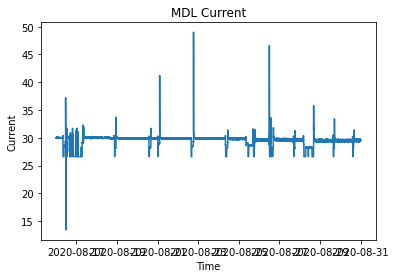

In [86]:
# single representation current
plt.plot(time,current_MDL)
plt.xlabel('Time') 
plt.ylabel('Current') 
plt.title("MDL Current")

Preprocessing data batch

Current batch of week

In [87]:
# time batch
time_week1 = sensordata.iloc[:1440,0]
time_week2 = sensordata.iloc[5760:7200,0]
time_week3 = sensordata.iloc[15840:17280,0]

#### MDL ####

#week 1
MDL_current_day1 = sensordata.iloc[:1440,1]
MDL_current_day2 = sensordata.iloc[1440:2880, 1]
MDL_current_day3 = sensordata.iloc[2880:4320, 1]
MDL_current_day4 = sensordata.iloc[4320:5760, 1]

#week 2
MDL_current_day5 = sensordata.iloc[5760:7200,1]
MDL_current_day6 = sensordata.iloc[7200:8640,1]
MDL_current_day7 = sensordata.iloc[8640:10080,1]
MDL_current_day8 = sensordata.iloc[10080:11520,1]
MDL_current_day9 = sensordata.iloc[11520:12960,1]
MDL_current_day10 = sensordata.iloc[12960:14400,1]
MDL_current_day11 = sensordata.iloc[14400:15840,1]

#week 3
MDL_current_day12 = sensordata.iloc[15840:17280,1]
MDL_current_day13 = sensordata.iloc[17280:18720,1]
MDL_current_day14 = sensordata.iloc[18720:21060,1]
MDL_current_day15 = sensordata.iloc[21060:21598,1]

##### MDM #####

#week 1
MDM_current_day1 = sensordata.iloc[:1440,2]
MDM_current_day2 = sensordata.iloc[1440:2880, 2]
MDM_current_day3 = sensordata.iloc[2880:4320, 2]
MDM_current_day4 = sensordata.iloc[4320:5760, 2]

#week 2
MDM_current_day5 = sensordata.iloc[5760:7200,2]
MDM_current_day6 = sensordata.iloc[7200:8640,2]
MDM_current_day7 = sensordata.iloc[8640:10080,2]
MDM_current_day8 = sensordata.iloc[10080:11520,2]
MDM_current_day9 = sensordata.iloc[11520:12960,2]
MDM_current_day10 = sensordata.iloc[12960:14400,2]
MDM_current_day11 = sensordata.iloc[14400:15840,2]

#week 3
MDM_current_day12 = sensordata.iloc[15840:17280,2]
MDM_current_day13 = sensordata.iloc[17280:18720,2]
MDM_current_day14 = sensordata.iloc[18720:21060,2]
MDM_current_day15 = sensordata.iloc[21060:21598,2]

####### MDH #######

#week 1
MDH_current_day1 = sensordata.iloc[:1440,3]
MDH_current_day2 = sensordata.iloc[1440:2880, 3]
MDH_current_day2 = sensordata.iloc[1440:2880, 3]
MDH_current_day3 = sensordata.iloc[2880:4320, 3]
MDH_current_day4 = sensordata.iloc[4320:5760, 3]

#week 2
MDH_current_day5 = sensordata.iloc[5760:7200,3]
MDH_current_day6 = sensordata.iloc[7200:8640,3]
MDH_current_day7 = sensordata.iloc[8640:10080,3]
MDH_current_day8 = sensordata.iloc[10080:11520,3]
MDH_current_day9 = sensordata.iloc[11520:12960,3]
MDH_current_day10 = sensordata.iloc[12960:14400,3]
MDH_current_day11 = sensordata.iloc[14400:15840,3]

#week 3
MDH_current_day12 = sensordata.iloc[15840:17280,3]
MDH_current_day13 = sensordata.iloc[17280:18720,3]
MDH_current_day14 = sensordata.iloc[18720:21060,3]
MDH_current_day15 = sensordata.iloc[21060:21598,3]

#week 1
MDH_current_day1 = sensordata.iloc[:1440,3]
MDH_current_day2 = sensordata.iloc[1440:2880, 3]
MDH_current_day3 = sensordata.iloc[2880:4320, 3]
MDH_current_day4 = sensordata.iloc[4320:5760, 3]

#week 2
MDH_current_day5 = sensordata.iloc[5760:7200,3]
MDH_current_day6 = sensordata.iloc[7200:8640,3]
MDH_current_day7 = sensordata.iloc[8640:10080,3]
MDH_current_day8 = sensordata.iloc[10080:11520,3]
MDH_current_day9 = sensordata.iloc[11520:12960,3]
MDH_current_day10 = sensordata.iloc[12960:14400,3]
MDH_current_day11 = sensordata.iloc[14400:15840,3]

#week 3
MDH_current_day12 = sensordata.iloc[15840:17280,3]
MDH_current_day13 = sensordata.iloc[17280:18720,3]
MDH_current_day14 = sensordata.iloc[18720:21060,3]
MDH_current_day15 = sensordata.iloc[21060:21598,3]

Speed batch of week

In [88]:
###### MDL #######

#week 1
MDL_speed_day1 = sensordata.iloc[:1440,4]
MDL_speed_day2 = sensordata.iloc[1440:2880, 4]
MDL_speed_day3 = sensordata.iloc[2880:4320, 4]
MDL_speed_day4 = sensordata.iloc[4320:5760, 4]

#week 2
MDL_speed_day5 = sensordata.iloc[5760:7200,4]
MDL_speed_day6 = sensordata.iloc[7200:8640,4]
MDL_speed_day7 = sensordata.iloc[8640:10080,4]
MDL_speed_day8 = sensordata.iloc[10080:11520,4]
MDL_speed_day9 = sensordata.iloc[11520:12960,4]
MDL_speed_day10 = sensordata.iloc[12960:14400,4]
MDL_speed_day11 = sensordata.iloc[14400:15840,4]

#week 3
MDL_speed_day12 = sensordata.iloc[15840:17280,4]
MDL_speed_day13 = sensordata.iloc[17280:18720,4]
MDL_speed_day14 = sensordata.iloc[18720:21060,4]
MDL_speed_day15 = sensordata.iloc[21060:21598,4]

####### MDM #######
#week 1
MDM_speed_day1 = sensordata.iloc[:1440,5]
MDM_speed_day2 = sensordata.iloc[1440:2880, 5]
MDM_speed_day3 = sensordata.iloc[2880:4320, 5]
MDM_speed_day4 = sensordata.iloc[4320:5760, 5]

#week 2
MDM_speed_day5 = sensordata.iloc[5760:7200,5]
MDM_speed_day6 = sensordata.iloc[7200:8640,5]
MDM_speed_day7 = sensordata.iloc[8640:10080,5]
MDM_speed_day8 = sensordata.iloc[10080:11520,5]
MDM_speed_day9 = sensordata.iloc[11520:12960,5]
MDM_speed_day10 = sensordata.iloc[12960:14400,5]
MDM_speed_day11 = sensordata.iloc[14400:15840,5]

#week 3
MDM_speed_day12 = sensordata.iloc[15840:17280,5]
MDM_speed_day13 = sensordata.iloc[17280:18720,5]
MDM_speed_day14 = sensordata.iloc[18720:21060,5]
MDM_speed_day15 = sensordata.iloc[21060:21598,5]

######## MDH #######
#week 1
MDH_speed_day1 = sensordata.iloc[:1440,6]
MDH_speed_day2 = sensordata.iloc[1440:2880, 6]
MDH_speed_day3 = sensordata.iloc[2880:4320, 6]
MDH_speed_day4 = sensordata.iloc[4320:5760, 6]

#week 2
MDH_speed_day5 = sensordata.iloc[5760:7200,6]
MDH_speed_day6 = sensordata.iloc[7200:8640,6]
MDH_speed_day7 = sensordata.iloc[8640:10080,6]
MDH_speed_day8 = sensordata.iloc[10080:11520,6]
MDH_speed_day9 = sensordata.iloc[11520:12960,6]
MDH_speed_day10 = sensordata.iloc[12960:14400,6]
MDH_speed_day11 = sensordata.iloc[14400:15840,6]

#week 3
MDH_speed_day12 = sensordata.iloc[15840:17280,6]
MDH_speed_day13 = sensordata.iloc[17280:18720,6]
MDH_speed_day14 = sensordata.iloc[18720:21060,6]
MDH_speed_day15 = sensordata.iloc[21060:21598,6]


Torque batch of week

In [89]:
###### MDL #######
#week 1
MDL_torque_day1 = sensordata.iloc[:1440,4]
MDL_torque_day2 = sensordata.iloc[1440:2880, 4]
MDL_torque_day3 = sensordata.iloc[2880:4320, 4]
MDL_torque_day4 = sensordata.iloc[4320:5760, 4]

#week 2
MDL_torque_day5 = sensordata.iloc[5760:7200,4]
MDL_torque_day6 = sensordata.iloc[7200:8640,4]
MDL_torque_day7 = sensordata.iloc[8640:10080,4]
MDL_torque_day8 = sensordata.iloc[10080:11520,4]
MDL_torque_day9 = sensordata.iloc[11520:12960,4]
MDL_torque_day10 = sensordata.iloc[12960:14400,4]
MDL_torque_day11 = sensordata.iloc[14400:15840,4]

#week 3
MDL_torque_day12 = sensordata.iloc[15840:17280,4]
MDL_torque_day13 = sensordata.iloc[17280:18720,4]
MDL_torque_day14 = sensordata.iloc[18720:21060,4]
MDL_torque_day15 = sensordata.iloc[21060:21598,4]

####### MDM #######
#week 1
MDM_torque_day1 = sensordata.iloc[:1440,5]
MDM_torque_day2 = sensordata.iloc[1440:2880, 5]
MDM_torque_day3 = sensordata.iloc[2880:4320, 5]
MDM_torque_day4 = sensordata.iloc[4320:5760, 5]

#week 2
MDM_torque_day5 = sensordata.iloc[5760:7200,5]
MDM_torque_day6 = sensordata.iloc[7200:8640,5]
MDM_torque_day7 = sensordata.iloc[8640:10080,5]
MDM_torque_day8 = sensordata.iloc[10080:11520,5]
MDM_torque_day9 = sensordata.iloc[11520:12960,5]
MDM_torque_day10 = sensordata.iloc[12960:14400,5]
MDM_torque_day11 = sensordata.iloc[14400:15840,5]

#week 3
MDM_torque_day12 = sensordata.iloc[15840:17280,5]
MDM_torque_day13 = sensordata.iloc[17280:18720,5]
MDM_torque_day14 = sensordata.iloc[18720:21060,5]
MDM_torque_day15 = sensordata.iloc[21060:21598,5]

######## MDH #######
#week 1
MDH_torque_day1 = sensordata.iloc[:1440,6]
MDH_torque_day2 = sensordata.iloc[1440:2880, 6]
MDH_torque_day3 = sensordata.iloc[2880:4320, 6]
MDH_torque_day4 = sensordata.iloc[4320:5760, 6]

#week 2
MDH_torque_day5 = sensordata.iloc[5760:7200,6]
MDH_torque_day6 = sensordata.iloc[7200:8640,6]
MDH_torque_day7 = sensordata.iloc[8640:10080,6]
MDH_torque_day8 = sensordata.iloc[10080:11520,6]
MDH_torque_day9 = sensordata.iloc[11520:12960,6]
MDH_torque_day10 = sensordata.iloc[12960:14400,6]
MDH_torque_day11 = sensordata.iloc[14400:15840,6]

#week 3
MDH_torque_day12 = sensordata.iloc[15840:17280,6]
MDH_torque_day13 = sensordata.iloc[17280:18720,6]
MDH_torque_day14 = sensordata.iloc[18720:21060,6]
MDH_torque_day15 = sensordata.iloc[21060:21598,6]

Statistical Feature extraction

Statistical feature MDL current/ MDM current/ MDH current 

**Mean**


In [90]:
#current MDL
#week1
MDL_mean_currentday1 =np.mean(MDL_current_day1)
MDL_mean_currentday2 =np.mean(MDL_current_day2)
MDL_mean_currentday3 =np.mean(MDL_current_day3)
MDL_mean_currentday4 =np.mean(MDL_current_day4)

#week2
MDL_mean_currentday5 =np.mean(MDL_current_day5)
MDL_mean_currentday6 =np.mean(MDL_current_day6)
MDL_mean_currentday7 =np.mean(MDL_current_day7)
MDL_mean_currentday8 =np.mean(MDL_current_day8)
MDL_mean_currentday9 =np.mean(MDL_current_day9)
MDL_mean_currentday10 =np.mean(MDL_current_day10)
MDL_mean_currentday11 =np.mean(MDL_current_day11)

#week3
MDL_mean_currentday12 =np.mean(MDL_current_day12)
MDL_mean_currentday13 =np.mean(MDL_current_day13)
MDL_mean_currentday14 =np.mean(MDL_current_day14)
MDL_mean_currentday15 =np.mean(MDL_current_day15)

#current MDM
#week1
MDM_mean_currentday1 =np.mean(MDM_current_day1)
MDM_mean_currentday2 =np.mean(MDM_current_day2)
MDM_mean_currentday3 =np.mean(MDM_current_day3)
MDM_mean_currentday4 =np.mean(MDM_current_day4)

#week2
MDM_mean_currentday5 =np.mean(MDM_current_day5)
MDM_mean_currentday6 =np.mean(MDM_current_day6)
MDM_mean_currentday7 =np.mean(MDM_current_day7)
MDM_mean_currentday8 =np.mean(MDM_current_day8)
MDM_mean_currentday9 =np.mean(MDM_current_day9)
MDM_mean_currentday10 =np.mean(MDM_current_day10)
MDM_mean_currentday11 =np.mean(MDM_current_day11)

#week3
MDM_mean_currentday12 =np.mean(MDM_current_day12)
MDM_mean_currentday13 =np.mean(MDM_current_day13)
MDM_mean_currentday14 =np.mean(MDM_current_day14)
MDM_mean_currentday15 =np.mean(MDM_current_day15)

#current MDH
#week1
MDH_mean_currentday1 =np.mean(MDH_current_day1)
MDH_mean_currentday2 =np.mean(MDH_current_day2)
MDH_mean_currentday3 =np.mean(MDH_current_day3)
MDH_mean_currentday4 =np.mean(MDH_current_day4)

#week2
MDH_mean_currentday5 =np.mean(MDH_current_day5)
MDH_mean_currentday6 =np.mean(MDH_current_day6)
MDH_mean_currentday7 =np.mean(MDH_current_day7)
MDH_mean_currentday8 =np.mean(MDH_current_day8)
MDH_mean_currentday9 =np.mean(MDH_current_day9)
MDH_mean_currentday10 =np.mean(MDH_current_day10)
MDH_mean_currentday11 =np.mean(MDH_current_day11)

#week3
MDH_mean_currentday12 =np.mean(MDH_current_day12)
MDH_mean_currentday13 =np.mean(MDH_current_day13)
MDH_mean_currentday14 =np.mean(MDH_current_day14)
MDH_mean_currentday15 =np.mean(MDH_current_day15)

###################################################

#speed MDL
#week1
MDL_mean_speedday1 =np.mean(MDL_speed_day1)
MDL_mean_speedday2 =np.mean(MDL_speed_day2)
MDL_mean_speedday3 =np.mean(MDL_speed_day3)
MDL_mean_speedday4 =np.mean(MDL_speed_day4)

#week2
MDL_mean_speedday5 =np.mean(MDL_speed_day5)
MDL_mean_speedday6 =np.mean(MDL_speed_day6)
MDL_mean_speedday7 =np.mean(MDL_speed_day7)
MDL_mean_speedday8 =np.mean(MDL_speed_day8)
MDL_mean_speedday9 =np.mean(MDL_speed_day9)
MDL_mean_speedday10 =np.mean(MDL_speed_day10)
MDL_mean_speedday11 =np.mean(MDL_speed_day11)

#week3
MDL_mean_speedday12 =np.mean(MDL_speed_day12)
MDL_mean_speedday13 =np.mean(MDL_speed_day13)
MDL_mean_speedday14 =np.mean(MDL_speed_day14)
MDL_mean_speedday15 =np.mean(MDL_speed_day15)

#speed MDM
#week1
MDM_mean_speedday1 =np.mean(MDM_speed_day1)
MDM_mean_speedday2 =np.mean(MDM_speed_day2)
MDM_mean_speedday3 =np.mean(MDM_speed_day3)
MDM_mean_speedday4 =np.mean(MDM_speed_day4)

#week2
MDM_mean_speedday5 =np.mean(MDM_speed_day5)
MDM_mean_speedday6 =np.mean(MDM_speed_day6)
MDM_mean_speedday7 =np.mean(MDM_speed_day7)
MDM_mean_speedday8 =np.mean(MDM_speed_day8)
MDM_mean_speedday9 =np.mean(MDM_speed_day9)
MDM_mean_speedday10 =np.mean(MDM_speed_day10)
MDM_mean_speedday11 =np.mean(MDM_speed_day11)

#week3
MDM_mean_speedday12 =np.mean(MDM_speed_day12)
MDM_mean_speedday13 =np.mean(MDM_speed_day13)
MDM_mean_speedday14 =np.mean(MDM_speed_day14)
MDM_mean_speedday15 =np.mean(MDM_speed_day15)

#speed MDH
#week1
MDH_mean_speedday1 =np.mean(MDH_speed_day1)
MDH_mean_speedday2 =np.mean(MDH_speed_day2)
MDH_mean_speedday3 =np.mean(MDH_speed_day3)
MDH_mean_speedday4 =np.mean(MDH_speed_day4)

#week2
MDH_mean_speedday5 =np.mean(MDH_speed_day5)
MDH_mean_speedday6 =np.mean(MDH_speed_day6)
MDH_mean_speedday7 =np.mean(MDH_speed_day7)
MDH_mean_speedday8 =np.mean(MDH_speed_day8)
MDH_mean_speedday9 =np.mean(MDH_speed_day9)
MDH_mean_speedday10 =np.mean(MDH_speed_day10)
MDH_mean_speedday11 =np.mean(MDH_speed_day11)

#week3
MDH_mean_speedday12 =np.mean(MDH_speed_day12)
MDH_mean_speedday13 =np.mean(MDH_speed_day13)
MDH_mean_speedday14 =np.mean(MDH_speed_day14)
MDH_mean_speedday15 =np.mean(MDH_speed_day15)

##############################################
#torque MDL
#week1
MDL_mean_torqueday1 =np.mean(MDL_torque_day1)
MDL_mean_torqueday2 =np.mean(MDL_torque_day2)
MDL_mean_torqueday3 =np.mean(MDL_torque_day3)
MDL_mean_torqueday4 =np.mean(MDL_torque_day4)

#week2
MDL_mean_torqueday5 =np.mean(MDL_torque_day5)
MDL_mean_torqueday6 =np.mean(MDL_torque_day6)
MDL_mean_torqueday7 =np.mean(MDL_torque_day7)
MDL_mean_torqueday8 =np.mean(MDL_torque_day8)
MDL_mean_torqueday9 =np.mean(MDL_torque_day9)
MDL_mean_torqueday10 =np.mean(MDL_torque_day10)
MDL_mean_torqueday11 =np.mean(MDL_torque_day11)

#week3
MDL_mean_torqueday12 =np.mean(MDL_torque_day12)
MDL_mean_torqueday13 =np.mean(MDL_torque_day13)
MDL_mean_torqueday14 =np.mean(MDL_torque_day14)
MDL_mean_torqueday15 =np.mean(MDL_torque_day15)

#torque MDM
#week1
MDM_mean_torqueday1 =np.mean(MDM_torque_day1)
MDM_mean_torqueday2 =np.mean(MDM_torque_day2)
MDM_mean_torqueday3 =np.mean(MDM_torque_day3)
MDM_mean_torqueday4 =np.mean(MDM_torque_day4)

#week2
MDM_mean_torqueday5 =np.mean(MDM_torque_day5)
MDM_mean_torqueday6 =np.mean(MDM_torque_day6)
MDM_mean_torqueday7 =np.mean(MDM_torque_day7)
MDM_mean_torqueday8 =np.mean(MDM_torque_day8)
MDM_mean_torqueday9 =np.mean(MDM_torque_day9)
MDM_mean_torqueday10 =np.mean(MDM_torque_day10)
MDM_mean_torqueday11 =np.mean(MDM_torque_day11)

#week3
MDM_mean_torqueday12 =np.mean(MDM_torque_day12)
MDM_mean_torqueday13 =np.mean(MDM_torque_day13)
MDM_mean_torqueday14 =np.mean(MDM_torque_day14)
MDM_mean_torqueday15 =np.mean(MDM_torque_day15)

#torque MDH
#week1
MDH_mean_torqueday1 =np.mean(MDH_torque_day1)
MDH_mean_torqueday2 =np.mean(MDH_torque_day2)
MDH_mean_torqueday3 =np.mean(MDH_torque_day3)
MDH_mean_torqueday4 =np.mean(MDH_torque_day4)

#week2
MDH_mean_torqueday5 =np.mean(MDH_torque_day5)
MDH_mean_torqueday6 =np.mean(MDH_torque_day6)
MDH_mean_torqueday7 =np.mean(MDH_torque_day7)
MDH_mean_torqueday8 =np.mean(MDH_torque_day8)
MDH_mean_torqueday9 =np.mean(MDH_torque_day9)
MDH_mean_torqueday10 =np.mean(MDH_torque_day10)
MDH_mean_torqueday11 =np.mean(MDH_torque_day11)

#week3
MDH_mean_torqueday12 =np.mean(MDH_torque_day12)
MDH_mean_torqueday13 =np.mean(MDH_torque_day13)
MDH_mean_torqueday14 =np.mean(MDH_torque_day14)
MDH_mean_torqueday15 =np.mean(MDH_torque_day15)



Statistical Feature 

**Median**

In [91]:
#current MDL
#week1
MDL_median_currentday1 =np.median(MDL_current_day1)
MDL_median_currentday2 =np.median(MDL_current_day2)
MDL_median_currentday3 =np.median(MDL_current_day3)
MDL_median_currentday4 =np.median(MDL_current_day4)

#week2
MDL_median_currentday5 =np.median(MDL_current_day5)
MDL_median_currentday6 =np.median(MDL_current_day6)
MDL_median_currentday7 =np.median(MDL_current_day7)
MDL_median_currentday8 =np.median(MDL_current_day8)
MDL_median_currentday9 =np.median(MDL_current_day9)
MDL_median_currentday10 =np.median(MDL_current_day10)
MDL_median_currentday11 =np.median(MDL_current_day11)

#week3
MDL_median_currentday12 =np.median(MDL_current_day12)
MDL_median_currentday13 =np.median(MDL_current_day13)
MDL_median_currentday14 =np.median(MDL_current_day14)
MDL_median_currentday15 =np.median(MDL_current_day15)

#current MDM
#week1
MDM_median_currentday1 =np.median(MDM_current_day1)
MDM_median_currentday2 =np.median(MDM_current_day2)
MDM_median_currentday3 =np.median(MDM_current_day3)
MDM_median_currentday4 =np.median(MDM_current_day4)

#week2
MDM_median_currentday5 =np.median(MDM_current_day5)
MDM_median_currentday6 =np.median(MDM_current_day6)
MDM_median_currentday7 =np.median(MDM_current_day7)
MDM_median_currentday8 =np.median(MDM_current_day8)
MDM_median_currentday9 =np.median(MDM_current_day9)
MDM_median_currentday10 =np.median(MDM_current_day10)
MDM_median_currentday11 =np.median(MDM_current_day11)

#week3
MDM_median_currentday12 =np.median(MDM_current_day12)
MDM_median_currentday13 =np.median(MDM_current_day13)
MDM_median_currentday14 =np.median(MDM_current_day14)
MDM_median_currentday15 =np.median(MDM_current_day15)

#current MDH
#week1
MDH_median_currentday1 =np.median(MDH_current_day1)
MDH_median_currentday2 =np.median(MDH_current_day2)
MDH_median_currentday3 =np.median(MDH_current_day3)
MDH_median_currentday4 =np.median(MDH_current_day4)

#week2
MDH_median_currentday5 =np.median(MDH_current_day5)
MDH_median_currentday6 =np.median(MDH_current_day6)
MDH_median_currentday7 =np.median(MDH_current_day7)
MDH_median_currentday8 =np.median(MDH_current_day8)
MDH_median_currentday9 =np.median(MDH_current_day9)
MDH_median_currentday10 =np.median(MDH_current_day10)
MDH_median_currentday11 =np.median(MDH_current_day11)

#week3
MDH_median_currentday12 =np.median(MDH_current_day12)
MDH_median_currentday13 =np.median(MDH_current_day13)
MDH_median_currentday14 =np.median(MDH_current_day14)
MDH_median_currentday15 =np.median(MDH_current_day15)

###################################################

#speed MDL
#week1
MDL_median_speedday1 =np.median(MDL_speed_day1)
MDL_median_speedday2 =np.median(MDL_speed_day2)
MDL_median_speedday3 =np.median(MDL_speed_day3)
MDL_median_speedday4 =np.median(MDL_speed_day4)

#week2
MDL_median_speedday5 =np.median(MDL_speed_day5)
MDL_median_speedday6 =np.median(MDL_speed_day6)
MDL_median_speedday7 =np.median(MDL_speed_day7)
MDL_median_speedday8 =np.median(MDL_speed_day8)
MDL_median_speedday9 =np.median(MDL_speed_day9)
MDL_median_speedday10 =np.median(MDL_speed_day10)
MDL_median_speedday11 =np.median(MDL_speed_day11)

#week3
MDL_median_speedday12 =np.median(MDL_speed_day12)
MDL_median_speedday13 =np.median(MDL_speed_day13)
MDL_median_speedday14 =np.median(MDL_speed_day14)
MDL_median_speedday15 =np.median(MDL_speed_day15)

#speed MDM
#week1
MDM_median_speedday1 =np.median(MDM_speed_day1)
MDM_median_speedday2 =np.median(MDM_speed_day2)
MDM_median_speedday3 =np.median(MDM_speed_day3)
MDM_median_speedday4 =np.median(MDM_speed_day4)

#week2
MDM_median_speedday5 =np.median(MDM_speed_day5)
MDM_median_speedday6 =np.median(MDM_speed_day6)
MDM_median_speedday7 =np.median(MDM_speed_day7)
MDM_median_speedday8 =np.median(MDM_speed_day8)
MDM_median_speedday9 =np.median(MDM_speed_day9)
MDM_median_speedday10 =np.median(MDM_speed_day10)
MDM_median_speedday11 =np.median(MDM_speed_day11)

#week3
MDM_median_speedday12 =np.median(MDM_speed_day12)
MDM_median_speedday13 =np.median(MDM_speed_day13)
MDM_median_speedday14 =np.median(MDM_speed_day14)
MDM_median_speedday15 =np.median(MDM_speed_day15)

#speed MDH
#week1
MDH_median_speedday1 =np.median(MDH_speed_day1)
MDH_median_speedday2 =np.median(MDH_speed_day2)
MDH_median_speedday3 =np.median(MDH_speed_day3)
MDH_median_speedday4 =np.median(MDH_speed_day4)

#week2
MDH_median_speedday5 =np.median(MDH_speed_day5)
MDH_median_speedday6 =np.median(MDH_speed_day6)
MDH_median_speedday7 =np.median(MDH_speed_day7)
MDH_median_speedday8 =np.median(MDH_speed_day8)
MDH_median_speedday9 =np.median(MDH_speed_day9)
MDH_median_speedday10 =np.median(MDH_speed_day10)
MDH_median_speedday11 =np.median(MDH_speed_day11)

#week3
MDH_median_speedday12 =np.median(MDH_speed_day12)
MDH_median_speedday13 =np.median(MDH_speed_day13)
MDH_median_speedday14 =np.median(MDH_speed_day14)
MDH_median_speedday15 =np.median(MDH_speed_day15)

##############################################
#torque MDL
#week1
MDL_median_torqueday1 =np.median(MDL_torque_day1)
MDL_median_torqueday2 =np.median(MDL_torque_day2)
MDL_median_torqueday3 =np.median(MDL_torque_day3)
MDL_median_torqueday4 =np.median(MDL_torque_day4)

#week2
MDL_median_torqueday5 =np.median(MDL_torque_day5)
MDL_median_torqueday6 =np.median(MDL_torque_day6)
MDL_median_torqueday7 =np.median(MDL_torque_day7)
MDL_median_torqueday8 =np.median(MDL_torque_day8)
MDL_median_torqueday9 =np.median(MDL_torque_day9)
MDL_median_torqueday10 =np.median(MDL_torque_day10)
MDL_median_torqueday11 =np.median(MDL_torque_day11)

#week3
MDL_median_torqueday12 =np.median(MDL_torque_day12)
MDL_median_torqueday13 =np.median(MDL_torque_day13)
MDL_median_torqueday14 =np.median(MDL_torque_day14)
MDL_median_torqueday15 =np.median(MDL_torque_day15)

#torque MDM
#week1
MDM_median_torqueday1 =np.median(MDM_torque_day1)
MDM_median_torqueday2 =np.median(MDM_torque_day2)
MDM_median_torqueday3 =np.median(MDM_torque_day3)
MDM_median_torqueday4 =np.median(MDM_torque_day4)

#week2
MDM_median_torqueday5 =np.median(MDM_torque_day5)
MDM_median_torqueday6 =np.median(MDM_torque_day6)
MDM_median_torqueday7 =np.median(MDM_torque_day7)
MDM_median_torqueday8 =np.median(MDM_torque_day8)
MDM_median_torqueday9 =np.median(MDM_torque_day9)
MDM_median_torqueday10 =np.median(MDM_torque_day10)
MDM_median_torqueday11 =np.median(MDM_torque_day11)

#week3
MDM_median_torqueday12 =np.median(MDM_torque_day12)
MDM_median_torqueday13 =np.median(MDM_torque_day13)
MDM_median_torqueday14 =np.median(MDM_torque_day14)
MDM_median_torqueday15 =np.median(MDM_torque_day15)

#torque MDH
#week1
MDH_median_torqueday1 =np.median(MDH_torque_day1)
MDH_median_torqueday2 =np.median(MDH_torque_day2)
MDH_median_torqueday3 =np.median(MDH_torque_day3)
MDH_median_torqueday4 =np.median(MDH_torque_day4)

#week2
MDH_median_torqueday5 =np.median(MDH_torque_day5)
MDH_median_torqueday6 =np.median(MDH_torque_day6)
MDH_median_torqueday7 =np.median(MDH_torque_day7)
MDH_median_torqueday8 =np.median(MDH_torque_day8)
MDH_median_torqueday9 =np.median(MDH_torque_day9)
MDH_median_torqueday10 =np.median(MDH_torque_day10)
MDH_median_torqueday11 =np.median(MDH_torque_day11)

#week3
MDH_median_torqueday12 =np.median(MDH_torque_day12)
MDH_median_torqueday13 =np.median(MDH_torque_day13)
MDH_median_torqueday14 =np.median(MDH_torque_day14)
MDH_median_torqueday15 =np.median(MDH_torque_day15)


Statistical Feature Extraction MDL torque/ MDM torque / MDH torque

**Variance**

In [92]:
#current MDL
#week1
MDL_var_currentday1 =np.var(MDL_current_day1)
MDL_var_currentday2 =np.var(MDL_current_day2)
MDL_var_currentday3 =np.var(MDL_current_day3)
MDL_var_currentday4 =np.var(MDL_current_day4)

#week2
MDL_var_currentday5 =np.var(MDL_current_day5)
MDL_var_currentday6 =np.var(MDL_current_day6)
MDL_var_currentday7 =np.var(MDL_current_day7)
MDL_var_currentday8 =np.var(MDL_current_day8)
MDL_var_currentday9 =np.var(MDL_current_day9)
MDL_var_currentday10 =np.var(MDL_current_day10)
MDL_var_currentday11 =np.var(MDL_current_day11)

#week3
MDL_var_currentday12 =np.var(MDL_current_day12)
MDL_var_currentday13 =np.var(MDL_current_day13)
MDL_var_currentday14 =np.var(MDL_current_day14)
MDL_var_currentday15 =np.var(MDL_current_day15)

#current MDM
#week1
MDM_var_currentday1 =np.var(MDM_current_day1)
MDM_var_currentday2 =np.var(MDM_current_day2)
MDM_var_currentday3 =np.var(MDM_current_day3)
MDM_var_currentday4 =np.var(MDM_current_day4)

#week2
MDM_var_currentday5 =np.var(MDM_current_day5)
MDM_var_currentday6 =np.var(MDM_current_day6)
MDM_var_currentday7 =np.var(MDM_current_day7)
MDM_var_currentday8 =np.var(MDM_current_day8)
MDM_var_currentday9 =np.var(MDM_current_day9)
MDM_var_currentday10 =np.var(MDM_current_day10)
MDM_var_currentday11 =np.var(MDM_current_day11)

#week3
MDM_var_currentday12 =np.var(MDM_current_day12)
MDM_var_currentday13 =np.var(MDM_current_day13)
MDM_var_currentday14 =np.var(MDM_current_day14)
MDM_var_currentday15 =np.var(MDM_current_day15)

#current MDH
#week1
MDH_var_currentday1 =np.var(MDH_current_day1)
MDH_var_currentday2 =np.var(MDH_current_day2)
MDH_var_currentday3 =np.var(MDH_current_day3)
MDH_var_currentday4 =np.var(MDH_current_day4)

#week2
MDH_var_currentday5 =np.var(MDH_current_day5)
MDH_var_currentday6 =np.var(MDH_current_day6)
MDH_var_currentday7 =np.var(MDH_current_day7)
MDH_var_currentday8 =np.var(MDH_current_day8)
MDH_var_currentday9 =np.var(MDH_current_day9)
MDH_var_currentday10 =np.var(MDH_current_day10)
MDH_var_currentday11 =np.var(MDH_current_day11)

#week3
MDH_var_currentday12 =np.var(MDH_current_day12)
MDH_var_currentday13 =np.var(MDH_current_day13)
MDH_var_currentday14 =np.var(MDH_current_day14)
MDH_var_currentday15 =np.var(MDH_current_day15)

###################################################

#speed MDL
#week1
MDL_var_speedday1 =np.var(MDL_speed_day1)
MDL_var_speedday2 =np.var(MDL_speed_day2)
MDL_var_speedday3 =np.var(MDL_speed_day3)
MDL_var_speedday4 =np.var(MDL_speed_day4)

#week2
MDL_var_speedday5 =np.var(MDL_speed_day5)
MDL_var_speedday6 =np.var(MDL_speed_day6)
MDL_var_speedday7 =np.var(MDL_speed_day7)
MDL_var_speedday8 =np.var(MDL_speed_day8)
MDL_var_speedday9 =np.var(MDL_speed_day9)
MDL_var_speedday10 =np.var(MDL_speed_day10)
MDL_var_speedday11 =np.var(MDL_speed_day11)

#week3
MDL_var_speedday12 =np.var(MDL_speed_day12)
MDL_var_speedday13 =np.var(MDL_speed_day13)
MDL_var_speedday14 =np.var(MDL_speed_day14)
MDL_var_speedday15 =np.var(MDL_speed_day15)

#speed MDM
#week1
MDM_var_speedday1 =np.var(MDM_speed_day1)
MDM_var_speedday2 =np.var(MDM_speed_day2)
MDM_var_speedday3 =np.var(MDM_speed_day3)
MDM_var_speedday4 =np.var(MDM_speed_day4)

#week2
MDM_var_speedday5 =np.var(MDM_speed_day5)
MDM_var_speedday6 =np.var(MDM_speed_day6)
MDM_var_speedday7 =np.var(MDM_speed_day7)
MDM_var_speedday8 =np.var(MDM_speed_day8)
MDM_var_speedday9 =np.var(MDM_speed_day9)
MDM_var_speedday10 =np.var(MDM_speed_day10)
MDM_var_speedday11 =np.var(MDM_speed_day11)

#week3
MDM_var_speedday12 =np.var(MDM_speed_day12)
MDM_var_speedday13 =np.var(MDM_speed_day13)
MDM_var_speedday14 =np.var(MDM_speed_day14)
MDM_var_speedday15 =np.var(MDM_speed_day15)

#speed MDH
#week1
MDH_var_speedday1 =np.var(MDH_speed_day1)
MDH_var_speedday2 =np.var(MDH_speed_day2)
MDH_var_speedday3 =np.var(MDH_speed_day3)
MDH_var_speedday4 =np.var(MDH_speed_day4)

#week2
MDH_var_speedday5 =np.var(MDH_speed_day5)
MDH_var_speedday6 =np.var(MDH_speed_day6)
MDH_var_speedday7 =np.var(MDH_speed_day7)
MDH_var_speedday8 =np.var(MDH_speed_day8)
MDH_var_speedday9 =np.var(MDH_speed_day9)
MDH_var_speedday10 =np.var(MDH_speed_day10)
MDH_var_speedday11 =np.var(MDH_speed_day11)

#week3
MDH_var_speedday12 =np.var(MDH_speed_day12)
MDH_var_speedday13 =np.var(MDH_speed_day13)
MDH_var_speedday14 =np.var(MDH_speed_day14)
MDH_var_speedday15 =np.var(MDH_speed_day15)

##############################################
#torque MDL
#week1
MDL_var_torqueday1 =np.var(MDL_torque_day1)
MDL_var_torqueday2 =np.var(MDL_torque_day2)
MDL_var_torqueday3 =np.var(MDL_torque_day3)
MDL_var_torqueday4 =np.var(MDL_torque_day4)

#week2
MDL_var_torqueday5 =np.var(MDL_torque_day5)
MDL_var_torqueday6 =np.var(MDL_torque_day6)
MDL_var_torqueday7 =np.var(MDL_torque_day7)
MDL_var_torqueday8 =np.var(MDL_torque_day8)
MDL_var_torqueday9 =np.var(MDL_torque_day9)
MDL_var_torqueday10 =np.var(MDL_torque_day10)
MDL_var_torqueday11 =np.var(MDL_torque_day11)

#week3
MDL_var_torqueday12 =np.var(MDL_torque_day12)
MDL_var_torqueday13 =np.var(MDL_torque_day13)
MDL_var_torqueday14 =np.var(MDL_torque_day14)
MDL_var_torqueday15 =np.var(MDL_torque_day15)

#torque MDM
#week1
MDM_var_torqueday1 =np.var(MDM_torque_day1)
MDM_var_torqueday2 =np.var(MDM_torque_day2)
MDM_var_torqueday3 =np.var(MDM_torque_day3)
MDM_var_torqueday4 =np.var(MDM_torque_day4)

#week2
MDM_var_torqueday5 =np.var(MDM_torque_day5)
MDM_var_torqueday6 =np.var(MDM_torque_day6)
MDM_var_torqueday7 =np.var(MDM_torque_day7)
MDM_var_torqueday8 =np.var(MDM_torque_day8)
MDM_var_torqueday9 =np.var(MDM_torque_day9)
MDM_var_torqueday10 =np.var(MDM_torque_day10)
MDM_var_torqueday11 =np.var(MDM_torque_day11)

#week3
MDM_var_torqueday12 =np.var(MDM_torque_day12)
MDM_var_torqueday13 =np.var(MDM_torque_day13)
MDM_var_torqueday14 =np.var(MDM_torque_day14)
MDM_var_torqueday15 =np.var(MDM_torque_day15)

#torque MDH
#week1
MDH_var_torqueday1 =np.var(MDH_torque_day1)
MDH_var_torqueday2 =np.var(MDH_torque_day2)
MDH_var_torqueday3 =np.var(MDH_torque_day3)
MDH_var_torqueday4 =np.var(MDH_torque_day4)

#week2
MDH_var_torqueday5 =np.var(MDH_torque_day5)
MDH_var_torqueday6 =np.var(MDH_torque_day6)
MDH_var_torqueday7 =np.var(MDH_torque_day7)
MDH_var_torqueday8 =np.var(MDH_torque_day8)
MDH_var_torqueday9 =np.var(MDH_torque_day9)
MDH_var_torqueday10 =np.var(MDH_torque_day10)
MDH_var_torqueday11 =np.var(MDH_torque_day11)

#week3
MDH_var_torqueday12 =np.var(MDH_torque_day12)
MDH_var_torqueday13 =np.var(MDH_torque_day13)
MDH_var_torqueday14 =np.var(MDH_torque_day14)
MDH_var_torqueday15 =np.var(MDH_torque_day15)


Statistical Feature Extraction MDL torque/ MDM torque / MDH torque

**Standard Deviation**

In [93]:
#current MDL
#week1
MDL_std_currentday1 =np.std(MDL_current_day1)
MDL_std_currentday2 =np.std(MDL_current_day2)
MDL_std_currentday3 =np.std(MDL_current_day3)
MDL_std_currentday4 =np.std(MDL_current_day4)

#week2
MDL_std_currentday5 =np.std(MDL_current_day5)
MDL_std_currentday6 =np.std(MDL_current_day6)
MDL_std_currentday7 =np.std(MDL_current_day7)
MDL_std_currentday8 =np.std(MDL_current_day8)
MDL_std_currentday9 =np.std(MDL_current_day9)
MDL_std_currentday10 =np.std(MDL_current_day10)
MDL_std_currentday11 =np.std(MDL_current_day11)

#week3
MDL_std_currentday12 =np.std(MDL_current_day12)
MDL_std_currentday13 =np.std(MDL_current_day13)
MDL_std_currentday14 =np.std(MDL_current_day14)
MDL_std_currentday15 =np.std(MDL_current_day15)

#current MDM
#week1
MDM_std_currentday1 =np.std(MDM_current_day1)
MDM_std_currentday2 =np.std(MDM_current_day2)
MDM_std_currentday3 =np.std(MDM_current_day3)
MDM_std_currentday4 =np.std(MDM_current_day4)

#week2
MDM_std_currentday5 =np.std(MDM_current_day5)
MDM_std_currentday6 =np.std(MDM_current_day6)
MDM_std_currentday7 =np.std(MDM_current_day7)
MDM_std_currentday8 =np.std(MDM_current_day8)
MDM_std_currentday9 =np.std(MDM_current_day9)
MDM_std_currentday10 =np.std(MDM_current_day10)
MDM_std_currentday11 =np.std(MDM_current_day11)

#week3
MDM_std_currentday12 =np.std(MDM_current_day12)
MDM_std_currentday13 =np.std(MDM_current_day13)
MDM_std_currentday14 =np.std(MDM_current_day14)
MDM_std_currentday15 =np.std(MDM_current_day15)

#current MDH
#week1
MDH_std_currentday1 =np.std(MDH_current_day1)
MDH_std_currentday2 =np.std(MDH_current_day2)
MDH_std_currentday3 =np.std(MDH_current_day3)
MDH_std_currentday4 =np.std(MDH_current_day4)

#week2
MDH_std_currentday5 =np.std(MDH_current_day5)
MDH_std_currentday6 =np.std(MDH_current_day6)
MDH_std_currentday7 =np.std(MDH_current_day7)
MDH_std_currentday8 =np.std(MDH_current_day8)
MDH_std_currentday9 =np.std(MDH_current_day9)
MDH_std_currentday10 =np.std(MDH_current_day10)
MDH_std_currentday11 =np.std(MDH_current_day11)

#week3
MDH_std_currentday12 =np.std(MDH_current_day12)
MDH_std_currentday13 =np.std(MDH_current_day13)
MDH_std_currentday14 =np.std(MDH_current_day14)
MDH_std_currentday15 =np.std(MDH_current_day15)

###################################################

#speed MDL
#week1
MDL_std_speedday1 =np.std(MDL_speed_day1)
MDL_std_speedday2 =np.std(MDL_speed_day2)
MDL_std_speedday3 =np.std(MDL_speed_day3)
MDL_std_speedday4 =np.std(MDL_speed_day4)

#week2
MDL_std_speedday5 =np.std(MDL_speed_day5)
MDL_std_speedday6 =np.std(MDL_speed_day6)
MDL_std_speedday7 =np.std(MDL_speed_day7)
MDL_std_speedday8 =np.std(MDL_speed_day8)
MDL_std_speedday9 =np.std(MDL_speed_day9)
MDL_std_speedday10 =np.std(MDL_speed_day10)
MDL_std_speedday11 =np.std(MDL_speed_day11)

#week3
MDL_std_speedday12 =np.std(MDL_speed_day12)
MDL_std_speedday13 =np.std(MDL_speed_day13)
MDL_std_speedday14 =np.std(MDL_speed_day14)
MDL_std_speedday15 =np.std(MDL_speed_day15)

#speed MDM
#week1
MDM_std_speedday1 =np.std(MDM_speed_day1)
MDM_std_speedday2 =np.std(MDM_speed_day2)
MDM_std_speedday3 =np.std(MDM_speed_day3)
MDM_std_speedday4 =np.std(MDM_speed_day4)

#week2
MDM_std_speedday5 =np.std(MDM_speed_day5)
MDM_std_speedday6 =np.std(MDM_speed_day6)
MDM_std_speedday7 =np.std(MDM_speed_day7)
MDM_std_speedday8 =np.std(MDM_speed_day8)
MDM_std_speedday9 =np.std(MDM_speed_day9)
MDM_std_speedday10 =np.std(MDM_speed_day10)
MDM_std_speedday11 =np.std(MDM_speed_day11)

#week3
MDM_std_speedday12 =np.std(MDM_speed_day12)
MDM_std_speedday13 =np.std(MDM_speed_day13)
MDM_std_speedday14 =np.std(MDM_speed_day14)
MDM_std_speedday15 =np.std(MDM_speed_day15)

#speed MDH
#week1
MDH_std_speedday1 =np.std(MDH_speed_day1)
MDH_std_speedday2 =np.std(MDH_speed_day2)
MDH_std_speedday3 =np.std(MDH_speed_day3)
MDH_std_speedday4 =np.std(MDH_speed_day4)

#week2
MDH_std_speedday5 =np.std(MDH_speed_day5)
MDH_std_speedday6 =np.std(MDH_speed_day6)
MDH_std_speedday7 =np.std(MDH_speed_day7)
MDH_std_speedday8 =np.std(MDH_speed_day8)
MDH_std_speedday9 =np.std(MDH_speed_day9)
MDH_std_speedday10 =np.std(MDH_speed_day10)
MDH_std_speedday11 =np.std(MDH_speed_day11)

#week3
MDH_std_speedday12 =np.std(MDH_speed_day12)
MDH_std_speedday13 =np.std(MDH_speed_day13)
MDH_std_speedday14 =np.std(MDH_speed_day14)
MDH_std_speedday15 =np.std(MDH_speed_day15)

##############################################
#torque MDL
#week1
MDL_std_torqueday1 =np.std(MDL_torque_day1)
MDL_std_torqueday2 =np.std(MDL_torque_day2)
MDL_std_torqueday3 =np.std(MDL_torque_day3)
MDL_std_torqueday4 =np.std(MDL_torque_day4)

#week2
MDL_std_torqueday5 =np.std(MDL_torque_day5)
MDL_std_torqueday6 =np.std(MDL_torque_day6)
MDL_std_torqueday7 =np.std(MDL_torque_day7)
MDL_std_torqueday8 =np.std(MDL_torque_day8)
MDL_std_torqueday9 =np.std(MDL_torque_day9)
MDL_std_torqueday10 =np.std(MDL_torque_day10)
MDL_std_torqueday11 =np.std(MDL_torque_day11)

#week3
MDL_std_torqueday12 =np.std(MDL_torque_day12)
MDL_std_torqueday13 =np.std(MDL_torque_day13)
MDL_std_torqueday14 =np.std(MDL_torque_day14)
MDL_std_torqueday15 =np.std(MDL_torque_day15)

#torque MDM
#week1
MDM_std_torqueday1 =np.std(MDM_torque_day1)
MDM_std_torqueday2 =np.std(MDM_torque_day2)
MDM_std_torqueday3 =np.std(MDM_torque_day3)
MDM_std_torqueday4 =np.std(MDM_torque_day4)

#week2
MDM_std_torqueday5 =np.std(MDM_torque_day5)
MDM_std_torqueday6 =np.std(MDM_torque_day6)
MDM_std_torqueday7 =np.std(MDM_torque_day7)
MDM_std_torqueday8 =np.std(MDM_torque_day8)
MDM_std_torqueday9 =np.std(MDM_torque_day9)
MDM_std_torqueday10 =np.std(MDM_torque_day10)
MDM_std_torqueday11 =np.std(MDM_torque_day11)

#week3
MDM_std_torqueday12 =np.std(MDM_torque_day12)
MDM_std_torqueday13 =np.std(MDM_torque_day13)
MDM_std_torqueday14 =np.std(MDM_torque_day14)
MDM_std_torqueday15 =np.std(MDM_torque_day15)

#torque MDH
#week1
MDH_std_torqueday1 =np.std(MDH_torque_day1)
MDH_std_torqueday2 =np.std(MDH_torque_day2)
MDH_std_torqueday3 =np.std(MDH_torque_day3)
MDH_std_torqueday4 =np.std(MDH_torque_day4)

#week2
MDH_std_torqueday5 =np.std(MDH_torque_day5)
MDH_std_torqueday6 =np.std(MDH_torque_day6)
MDH_std_torqueday7 =np.std(MDH_torque_day7)
MDH_std_torqueday8 =np.std(MDH_torque_day8)
MDH_std_torqueday9 =np.std(MDH_torque_day9)
MDH_std_torqueday10 =np.std(MDH_torque_day10)
MDH_std_torqueday11 =np.std(MDH_torque_day11)

#week3
MDH_std_torqueday12 =np.std(MDH_torque_day12)
MDH_std_torqueday13 =np.std(MDH_torque_day13)
MDH_std_torqueday14 =np.std(MDH_torque_day14)
MDH_std_torqueday15 =np.std(MDH_torque_day15)


Statistical Feature Extraction MDL torque/ MDM torque / MDH torque

**Skewness**

In [96]:
#current MDL
#week1
MDL_skew_currentday1 =skew(MDL_current_day1)
MDL_skew_currentday2 =skew(MDL_current_day2)
MDL_skew_currentday3 =skew(MDL_current_day3)
MDL_skew_currentday4 =skew(MDL_current_day4)

#week2
MDL_skew_currentday5 =skew(MDL_current_day5)
MDL_skew_currentday6 =skew(MDL_current_day6)
MDL_skew_currentday7 =skew(MDL_current_day7)
MDL_skew_currentday8 =skew(MDL_current_day8)
MDL_skew_currentday9 =skew(MDL_current_day9)
MDL_skew_currentday10 =skew(MDL_current_day10)
MDL_skew_currentday11 =skew(MDL_current_day11)

#week3
MDL_skew_currentday12 =skew(MDL_current_day12)
MDL_skew_currentday13 =skew(MDL_current_day13)
MDL_skew_currentday14 =skew(MDL_current_day14)
MDL_skew_currentday15 =skew(MDL_current_day15)

#current MDM
#week1
MDM_skew_currentday1 =skew(MDM_current_day1)
MDM_skew_currentday2 =skew(MDM_current_day2)
MDM_skew_currentday3 =skew(MDM_current_day3)
MDM_skew_currentday4 =skew(MDM_current_day4)

#week2
MDM_skew_currentday5 =skew(MDM_current_day5)
MDM_skew_currentday6 =skew(MDM_current_day6)
MDM_skew_currentday7 =skew(MDM_current_day7)
MDM_skew_currentday8 =skew(MDM_current_day8)
MDM_skew_currentday9 =skew(MDM_current_day9)
MDM_skew_currentday10 =skew(MDM_current_day10)
MDM_skew_currentday11 =skew(MDM_current_day11)

#week3
MDM_skew_currentday12 =skew(MDM_current_day12)
MDM_skew_currentday13 =skew(MDM_current_day13)
MDM_skew_currentday14 =skew(MDM_current_day14)
MDM_skew_currentday15 =skew(MDM_current_day15)

#current MDH
#week1
MDH_skew_currentday1 =skew(MDH_current_day1)
MDH_skew_currentday2 =skew(MDH_current_day2)
MDH_skew_currentday3 =skew(MDH_current_day3)
MDH_skew_currentday4 =skew(MDH_current_day4)

#week2
MDH_skew_currentday5 =skew(MDH_current_day5)
MDH_skew_currentday6 =skew(MDH_current_day6)
MDH_skew_currentday7 =skew(MDH_current_day7)
MDH_skew_currentday8 =skew(MDH_current_day8)
MDH_skew_currentday9 =skew(MDH_current_day9)
MDH_skew_currentday10 =skew(MDH_current_day10)
MDH_skew_currentday11 =skew(MDH_current_day11)

#week3
MDH_skew_currentday12 =skew(MDH_current_day12)
MDH_skew_currentday13 =skew(MDH_current_day13)
MDH_skew_currentday14 =skew(MDH_current_day14)
MDH_skew_currentday15 =skew(MDH_current_day15)

###################################################

#speed MDL
#week1
MDL_skew_speedday1 =skew(MDL_speed_day1)
MDL_skew_speedday2 =skew(MDL_speed_day2)
MDL_skew_speedday3 =skew(MDL_speed_day3)
MDL_skew_speedday4 =skew(MDL_speed_day4)

#week2
MDL_skew_speedday5 =skew(MDL_speed_day5)
MDL_skew_speedday6 =skew(MDL_speed_day6)
MDL_skew_speedday7 =skew(MDL_speed_day7)
MDL_skew_speedday8 =skew(MDL_speed_day8)
MDL_skew_speedday9 =skew(MDL_speed_day9)
MDL_skew_speedday10 =skew(MDL_speed_day10)
MDL_skew_speedday11 =skew(MDL_speed_day11)

#week3
MDL_skew_speedday12 =skew(MDL_speed_day12)
MDL_skew_speedday13 =skew(MDL_speed_day13)
MDL_skew_speedday14 =skew(MDL_speed_day14)
MDL_skew_speedday15 =skew(MDL_speed_day15)

#speed MDM
#week1
MDM_skew_speedday1 =skew(MDM_speed_day1)
MDM_skew_speedday2 =skew(MDM_speed_day2)
MDM_skew_speedday3 =skew(MDM_speed_day3)
MDM_skew_speedday4 =skew(MDM_speed_day4)

#week2
MDM_skew_speedday5 =skew(MDM_speed_day5)
MDM_skew_speedday6 =skew(MDM_speed_day6)
MDM_skew_speedday7 =skew(MDM_speed_day7)
MDM_skew_speedday8 =skew(MDM_speed_day8)
MDM_skew_speedday9 =skew(MDM_speed_day9)
MDM_skew_speedday10 =skew(MDM_speed_day10)
MDM_skew_speedday11 =skew(MDM_speed_day11)

#week3
MDM_skew_speedday12 =skew(MDM_speed_day12)
MDM_skew_speedday13 =skew(MDM_speed_day13)
MDM_skew_speedday14 =skew(MDM_speed_day14)
MDM_skew_speedday15 =skew(MDM_speed_day15)

#speed MDH
#week1
MDH_skew_speedday1 =skew(MDH_speed_day1)
MDH_skew_speedday2 =skew(MDH_speed_day2)
MDH_skew_speedday3 =skew(MDH_speed_day3)
MDH_skew_speedday4 =skew(MDH_speed_day4)

#week2
MDH_skew_speedday5 =skew(MDH_speed_day5)
MDH_skew_speedday6 =skew(MDH_speed_day6)
MDH_skew_speedday7 =skew(MDH_speed_day7)
MDH_skew_speedday8 =skew(MDH_speed_day8)
MDH_skew_speedday9 =skew(MDH_speed_day9)
MDH_skew_speedday10 =skew(MDH_speed_day10)
MDH_skew_speedday11 =skew(MDH_speed_day11)

#week3
MDH_skew_speedday12 =skew(MDH_speed_day12)
MDH_skew_speedday13 =skew(MDH_speed_day13)
MDH_skew_speedday14 =skew(MDH_speed_day14)
MDH_skew_speedday15 =skew(MDH_speed_day15)

##############################################
#torque MDL
#week1
MDL_skew_torqueday1 =skew(MDL_torque_day1)
MDL_skew_torqueday2 =skew(MDL_torque_day2)
MDL_skew_torqueday3 =skew(MDL_torque_day3)
MDL_skew_torqueday4 =skew(MDL_torque_day4)

#week2
MDL_skew_torqueday5 =skew(MDL_torque_day5)
MDL_skew_torqueday6 =skew(MDL_torque_day6)
MDL_skew_torqueday7 =skew(MDL_torque_day7)
MDL_skew_torqueday8 =skew(MDL_torque_day8)
MDL_skew_torqueday9 =skew(MDL_torque_day9)
MDL_skew_torqueday10 =skew(MDL_torque_day10)
MDL_skew_torqueday11 =skew(MDL_torque_day11)

#week3
MDL_skew_torqueday12 =skew(MDL_torque_day12)
MDL_skew_torqueday13 =skew(MDL_torque_day13)
MDL_skew_torqueday14 =skew(MDL_torque_day14)
MDL_skew_torqueday15 =skew(MDL_torque_day15)

#torque MDM
#week1
MDM_skew_torqueday1 =skew(MDM_torque_day1)
MDM_skew_torqueday2 =skew(MDM_torque_day2)
MDM_skew_torqueday3 =skew(MDM_torque_day3)
MDM_skew_torqueday4 =skew(MDM_torque_day4)

#week2
MDM_skew_torqueday5 =skew(MDM_torque_day5)
MDM_skew_torqueday6 =skew(MDM_torque_day6)
MDM_skew_torqueday7 =skew(MDM_torque_day7)
MDM_skew_torqueday8 =skew(MDM_torque_day8)
MDM_skew_torqueday9 =skew(MDM_torque_day9)
MDM_skew_torqueday10 =skew(MDM_torque_day10)
MDM_skew_torqueday11 =skew(MDM_torque_day11)

#week3
MDM_skew_torqueday12 =skew(MDM_torque_day12)
MDM_skew_torqueday13 =skew(MDM_torque_day13)
MDM_skew_torqueday14 =skew(MDM_torque_day14)
MDM_skew_torqueday15 =skew(MDM_torque_day15)

#torque MDH
#week1
MDH_skew_torqueday1 =skew(MDH_torque_day1)
MDH_skew_torqueday2 =skew(MDH_torque_day2)
MDH_skew_torqueday3 =skew(MDH_torque_day3)
MDH_skew_torqueday4 =skew(MDH_torque_day4)

#week2
MDH_skew_torqueday5 =skew(MDH_torque_day5)
MDH_skew_torqueday6 =skew(MDH_torque_day6)
MDH_skew_torqueday7 =skew(MDH_torque_day7)
MDH_skew_torqueday8 =skew(MDH_torque_day8)
MDH_skew_torqueday9 =skew(MDH_torque_day9)
MDH_skew_torqueday10 =skew(MDH_torque_day10)
MDH_skew_torqueday11 =skew(MDH_torque_day11)

#week3
MDH_skew_torqueday12 =skew(MDH_torque_day12)
MDH_skew_torqueday13 =skew(MDH_torque_day13)
MDH_skew_torqueday14 =skew(MDH_torque_day14)
MDH_skew_torqueday15 =skew(MDH_torque_day15)


Statistical Feature Extraction MDL torque/ MDM torque / MDH torque

**Kurtosis**

In [101]:
#current MDL
#week1
MDL_kurtosis_currentday1 =kurtosis(MDL_current_day1)
MDL_kurtosis_currentday2 =kurtosis(MDL_current_day2)
MDL_kurtosis_currentday3 =kurtosis(MDL_current_day3)
MDL_kurtosis_currentday4 =kurtosis(MDL_current_day4)

#week2
MDL_kurtosis_currentday5 =kurtosis(MDL_current_day5)
MDL_kurtosis_currentday6 =kurtosis(MDL_current_day6)
MDL_kurtosis_currentday7 =kurtosis(MDL_current_day7)
MDL_kurtosis_currentday8 =kurtosis(MDL_current_day8)
MDL_kurtosis_currentday9 =kurtosis(MDL_current_day9)
MDL_kurtosis_currentday10 =kurtosis(MDL_current_day10)
MDL_kurtosis_currentday11 =kurtosis(MDL_current_day11)

#week3
MDL_kurtosis_currentday12 =kurtosis(MDL_current_day12)
MDL_kurtosis_currentday13 =kurtosis(MDL_current_day13)
MDL_kurtosis_currentday14 =kurtosis(MDL_current_day14)
MDL_kurtosis_currentday15 =kurtosis(MDL_current_day15)

#current MDM
#week1
MDM_kurtosis_currentday1 =kurtosis(MDM_current_day1)
MDM_kurtosis_currentday2 =kurtosis(MDM_current_day2)
MDM_kurtosis_currentday3 =kurtosis(MDM_current_day3)
MDM_kurtosis_currentday4 =kurtosis(MDM_current_day4)

#week2
MDM_kurtosis_currentday5 =kurtosis(MDM_current_day5)
MDM_kurtosis_currentday6 =kurtosis(MDM_current_day6)
MDM_kurtosis_currentday7 =kurtosis(MDM_current_day7)
MDM_kurtosis_currentday8 =kurtosis(MDM_current_day8)
MDM_kurtosis_currentday9 =kurtosis(MDM_current_day9)
MDM_kurtosis_currentday10 =kurtosis(MDM_current_day10)
MDM_kurtosis_currentday11 =kurtosis(MDM_current_day11)

#week3
MDM_kurtosis_currentday12 =kurtosis(MDM_current_day12)
MDM_kurtosis_currentday13 =kurtosis(MDM_current_day13)
MDM_kurtosis_currentday14 =kurtosis(MDM_current_day14)
MDM_kurtosis_currentday15 =kurtosis(MDM_current_day15)

#current MDH
#week1
MDH_kurtosis_currentday1 =kurtosis(MDH_current_day1)
MDH_kurtosis_currentday2 =kurtosis(MDH_current_day2)
MDH_kurtosis_currentday3 =kurtosis(MDH_current_day3)
MDH_kurtosis_currentday4 =kurtosis(MDH_current_day4)

#week2
MDH_kurtosis_currentday5 =kurtosis(MDH_current_day5)
MDH_kurtosis_currentday6 =kurtosis(MDH_current_day6)
MDH_kurtosis_currentday7 =kurtosis(MDH_current_day7)
MDH_kurtosis_currentday8 =kurtosis(MDH_current_day8)
MDH_kurtosis_currentday9 =kurtosis(MDH_current_day9)
MDH_kurtosis_currentday10 =kurtosis(MDH_current_day10)
MDH_kurtosis_currentday11 =kurtosis(MDH_current_day11)

#week3
MDH_kurtosis_currentday12 =kurtosis(MDH_current_day12)
MDH_kurtosis_currentday13 =kurtosis(MDH_current_day13)
MDH_kurtosis_currentday14 =kurtosis(MDH_current_day14)
MDH_kurtosis_currentday15 =kurtosis(MDH_current_day15)

###################################################

#speed MDL
#week1
MDL_kurtosis_speedday1 =kurtosis(MDL_speed_day1)
MDL_kurtosis_speedday2 =kurtosis(MDL_speed_day2)
MDL_kurtosis_speedday3 =kurtosis(MDL_speed_day3)
MDL_kurtosis_speedday4 =kurtosis(MDL_speed_day4)

#week2
MDL_kurtosis_speedday5 =kurtosis(MDL_speed_day5)
MDL_kurtosis_speedday6 =kurtosis(MDL_speed_day6)
MDL_kurtosis_speedday7 =kurtosis(MDL_speed_day7)
MDL_kurtosis_speedday8 =kurtosis(MDL_speed_day8)
MDL_kurtosis_speedday9 =kurtosis(MDL_speed_day9)
MDL_kurtosis_speedday10 =kurtosis(MDL_speed_day10)
MDL_kurtosis_speedday11 =kurtosis(MDL_speed_day11)

#week3
MDL_kurtosis_speedday12 =kurtosis(MDL_speed_day12)
MDL_kurtosis_speedday13 =kurtosis(MDL_speed_day13)
MDL_kurtosis_speedday14 =kurtosis(MDL_speed_day14)
MDL_kurtosis_speedday15 =kurtosis(MDL_speed_day15)

#speed MDM
#week1
MDM_kurtosis_speedday1 =kurtosis(MDM_speed_day1)
MDM_kurtosis_speedday2 =kurtosis(MDM_speed_day2)
MDM_kurtosis_speedday3 =kurtosis(MDM_speed_day3)
MDM_kurtosis_speedday4 =kurtosis(MDM_speed_day4)

#week2
MDM_kurtosis_speedday5 =kurtosis(MDM_speed_day5)
MDM_kurtosis_speedday6 =kurtosis(MDM_speed_day6)
MDM_kurtosis_speedday7 =kurtosis(MDM_speed_day7)
MDM_kurtosis_speedday8 =kurtosis(MDM_speed_day8)
MDM_kurtosis_speedday9 =kurtosis(MDM_speed_day9)
MDM_kurtosis_speedday10 =kurtosis(MDM_speed_day10)
MDM_kurtosis_speedday11 =kurtosis(MDM_speed_day11)

#week3
MDM_kurtosis_speedday12 =kurtosis(MDM_speed_day12)
MDM_kurtosis_speedday13 =kurtosis(MDM_speed_day13)
MDM_kurtosis_speedday14 =kurtosis(MDM_speed_day14)
MDM_kurtosis_speedday15 =kurtosis(MDM_speed_day15)

#speed MDH
#week1
MDH_kurtosis_speedday1 =kurtosis(MDH_speed_day1)
MDH_kurtosis_speedday2 =kurtosis(MDH_speed_day2)
MDH_kurtosis_speedday3 =kurtosis(MDH_speed_day3)
MDH_kurtosis_speedday4 =kurtosis(MDH_speed_day4)

#week2
MDH_kurtosis_speedday5 =kurtosis(MDH_speed_day5)
MDH_kurtosis_speedday6 =kurtosis(MDH_speed_day6)
MDH_kurtosis_speedday7 =kurtosis(MDH_speed_day7)
MDH_kurtosis_speedday8 =kurtosis(MDH_speed_day8)
MDH_kurtosis_speedday9 =kurtosis(MDH_speed_day9)
MDH_kurtosis_speedday10 =kurtosis(MDH_speed_day10)
MDH_kurtosis_speedday11 =kurtosis(MDH_speed_day11)

#week3
MDH_kurtosis_speedday12 =kurtosis(MDH_speed_day12)
MDH_kurtosis_speedday13 =kurtosis(MDH_speed_day13)
MDH_kurtosis_speedday14 =kurtosis(MDH_speed_day14)
MDH_kurtosis_speedday15 =kurtosis(MDH_speed_day15)

##############################################
#torque MDL
#week1
MDL_kurtosis_torqueday1 =kurtosis(MDL_torque_day1)
MDL_kurtosis_torqueday2 =kurtosis(MDL_torque_day2)
MDL_kurtosis_torqueday3 =kurtosis(MDL_torque_day3)
MDL_kurtosis_torqueday4 =kurtosis(MDL_torque_day4)

#week2
MDL_kurtosis_torqueday5 =kurtosis(MDL_torque_day5)
MDL_kurtosis_torqueday6 =kurtosis(MDL_torque_day6)
MDL_kurtosis_torqueday7 =kurtosis(MDL_torque_day7)
MDL_kurtosis_torqueday8 =kurtosis(MDL_torque_day8)
MDL_kurtosis_torqueday9 =kurtosis(MDL_torque_day9)
MDL_kurtosis_torqueday10 =kurtosis(MDL_torque_day10)
MDL_kurtosis_torqueday11 =kurtosis(MDL_torque_day11)

#week3
MDL_kurtosis_torqueday12 =kurtosis(MDL_torque_day12)
MDL_kurtosis_torqueday13 =kurtosis(MDL_torque_day13)
MDL_kurtosis_torqueday14 =kurtosis(MDL_torque_day14)
MDL_kurtosis_torqueday15 =kurtosis(MDL_torque_day15)

#torque MDM
#week1
MDM_kurtosis_torqueday1 =kurtosis(MDM_torque_day1)
MDM_kurtosis_torqueday2 =kurtosis(MDM_torque_day2)
MDM_kurtosis_torqueday3 =kurtosis(MDM_torque_day3)
MDM_kurtosis_torqueday4 =kurtosis(MDM_torque_day4)

#week2
MDM_kurtosis_torqueday5 =kurtosis(MDM_torque_day5)
MDM_kurtosis_torqueday6 =kurtosis(MDM_torque_day6)
MDM_kurtosis_torqueday7 =kurtosis(MDM_torque_day7)
MDM_kurtosis_torqueday8 =kurtosis(MDM_torque_day8)
MDM_kurtosis_torqueday9 =kurtosis(MDM_torque_day9)
MDM_kurtosis_torqueday10 =kurtosis(MDM_torque_day10)
MDM_kurtosis_torqueday11 =kurtosis(MDM_torque_day11)

#week3
MDM_kurtosis_torqueday12 =kurtosis(MDM_torque_day12)
MDM_kurtosis_torqueday13 =kurtosis(MDM_torque_day13)
MDM_kurtosis_torqueday14 =kurtosis(MDM_torque_day14)
MDM_kurtosis_torqueday15 =kurtosis(MDM_torque_day15)

#torque MDH
#week1
MDH_kurtosis_torqueday1 =kurtosis(MDH_torque_day1)
MDH_kurtosis_torqueday2 =kurtosis(MDH_torque_day2)
MDH_kurtosis_torqueday3 =kurtosis(MDH_torque_day3)
MDH_kurtosis_torqueday4 =kurtosis(MDH_torque_day4)

#week2
MDH_kurtosis_torqueday5 =kurtosis(MDH_torque_day5)
MDH_kurtosis_torqueday6 =kurtosis(MDH_torque_day6)
MDH_kurtosis_torqueday7 =kurtosis(MDH_torque_day7)
MDH_kurtosis_torqueday8 =kurtosis(MDH_torque_day8)
MDH_kurtosis_torqueday9 =kurtosis(MDH_torque_day9)
MDH_kurtosis_torqueday10 =kurtosis(MDH_torque_day10)
MDH_kurtosis_torqueday11 =kurtosis(MDH_torque_day11)

#week3
MDH_kurtosis_torqueday12 =kurtosis(MDH_torque_day12)
MDH_kurtosis_torqueday13 =kurtosis(MDH_torque_day13)
MDH_kurtosis_torqueday14 =kurtosis(MDH_torque_day14)
MDH_kurtosis_torqueday15 =kurtosis(MDH_torque_day15)


Visualisation

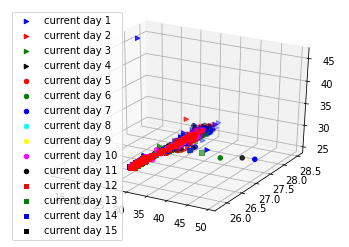

In [139]:

ax = plt.axes(projection ="3d")
#week1
ax.scatter3D(MDL_current_day1, MDM_current_day1, MDH_current_day1, color = "blue", marker= '>', label='current day 1')
ax.scatter3D(MDL_current_day2, MDM_current_day2, MDH_current_day2, color = "red", marker= '>', label='current day 2')
ax.scatter3D(MDL_current_day3, MDM_current_day3, MDH_current_day3, color = "green", marker= '>', label='current day 3')
ax.scatter3D(MDL_current_day4, MDM_current_day4, MDH_current_day4, color = "black", marker= '>', label='current day 4')

#week2
ax.scatter3D(MDL_current_day5, MDM_current_day5, MDH_current_day5, color = "red", marker= 'o', label='current day 5')
ax.scatter3D(MDL_current_day6, MDM_current_day6, MDH_current_day6, color = "green", marker= 'o', label='current day 6')
ax.scatter3D(MDL_current_day7, MDM_current_day7, MDH_current_day7, color = "blue", marker= 'o', label='current day 7')
ax.scatter3D(MDL_current_day8, MDM_current_day8, MDH_current_day8, color = "cyan", marker= 'o', label='current day 8')
ax.scatter3D(MDL_current_day9, MDM_current_day9, MDH_current_day9, color = "yellow", marker= 'o', label='current day 9')
ax.scatter3D(MDL_current_day10, MDM_current_day10, MDH_current_day10, color = "magenta", marker= 'o', label='current day 10')
ax.scatter3D(MDL_current_day11, MDM_current_day11, MDH_current_day11, color = "black", marker= 'o', label='current day 11')

#week3
ax.scatter3D(MDL_current_day12, MDM_current_day12, MDH_current_day12, color = "red", marker= 's', label='current day 12')
ax.scatter3D(MDL_current_day13, MDM_current_day13, MDH_current_day13, color = "green", marker= 's', label='current day 13')
ax.scatter3D(MDL_current_day14, MDM_current_day14, MDH_current_day14, color = "blue", marker= 's', label='current day 14')
ax.scatter3D(MDL_current_day15, MDM_current_day15, MDH_current_day15, color = "black", marker= 's', label='current day 15')


ax.legend()
###################################################

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

# rotate the axes and update
# for angle in range(0, 360):
#     ax.view_init(125, angle)

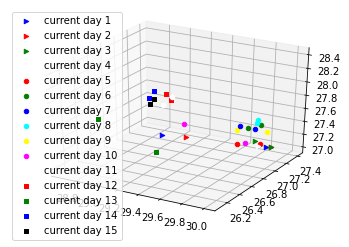

In [142]:
ax = plt.axes(projection ="3d")
#week1
ax.scatter3D(MDL_mean_currentday1, MDM_mean_currentday1, MDH_mean_currentday1, color = "blue", marker= '>', label='current day 1')
ax.scatter3D(MDL_mean_currentday2, MDM_mean_currentday2, MDH_mean_currentday2, color = "red", marker= '>', label='current day 2')
ax.scatter3D(MDL_mean_currentday3, MDM_mean_currentday3, MDH_mean_currentday3, color = "green", marker= '>', label='current day 3')
ax.scatter3D(MDL_mean_currentday4, MDM_mean_currentday4, MDH_mean_currentday4, color = "white", marker= '>', label='current day 4')

#week2
ax.scatter3D(MDL_mean_currentday5, MDM_mean_currentday5, MDH_mean_currentday5, color = "red", marker= 'o', label='current day 5')
ax.scatter3D(MDL_mean_currentday6, MDM_mean_currentday6, MDH_mean_currentday6, color = "green", marker= 'o', label='current day 6')
ax.scatter3D(MDL_mean_currentday7, MDM_mean_currentday7, MDH_mean_currentday7, color = "blue", marker= 'o', label='current day 7')
ax.scatter3D(MDL_mean_currentday8, MDM_mean_currentday8, MDH_mean_currentday8, color = "cyan", marker= 'o', label='current day 8')
ax.scatter3D(MDL_mean_currentday9, MDM_mean_currentday9, MDH_mean_currentday9, color = "yellow", marker= 'o', label='current day 9')
ax.scatter3D(MDL_mean_currentday10, MDM_mean_currentday10, MDH_mean_currentday10, color = "magenta", marker= 'o', label='current day 10')
ax.scatter3D(MDL_mean_currentday11, MDM_mean_currentday11, MDH_mean_currentday11, color = "white", marker= 'o', label='current day 11')

#week3
ax.scatter3D(MDL_mean_currentday12, MDM_mean_currentday12, MDH_mean_currentday12, color = "red", marker= 's', label='current day 12')
ax.scatter3D(MDL_mean_currentday13, MDM_mean_currentday13, MDH_mean_currentday13, color = "green", marker= 's', label='current day 13')
ax.scatter3D(MDL_mean_currentday14, MDM_mean_currentday14, MDH_mean_currentday14, color = "blue", marker= 's', label='current day 14')
ax.scatter3D(MDL_mean_currentday15, MDM_mean_currentday15, MDH_mean_currentday15, color = "black", marker= 's', label='current day 15')

#####

ax.scatter3D(MDL_median_currentday1, MDM_median_currentday1, MDH_median_currentday1, color = "blue", marker= '>')
ax.scatter3D(MDL_median_currentday2, MDM_median_currentday2, MDH_median_currentday2, color = "red", marker= '>')
ax.scatter3D(MDL_median_currentday3, MDM_median_currentday3, MDH_median_currentday3, color = "green", marker= '>')
ax.scatter3D(MDL_median_currentday4, MDM_median_currentday4, MDH_median_currentday4, color = "white", marker= '>')

#week2
ax.scatter3D(MDL_median_currentday5, MDM_median_currentday5, MDH_median_currentday5, color = "red", marker= 'o')
ax.scatter3D(MDL_median_currentday6, MDM_median_currentday6, MDH_median_currentday6, color = "green", marker= 'o')
ax.scatter3D(MDL_median_currentday7, MDM_median_currentday7, MDH_median_currentday7, color = "blue", marker= 'o')
ax.scatter3D(MDL_median_currentday8, MDM_median_currentday8, MDH_median_currentday8, color = "cyan", marker= 'o')
ax.scatter3D(MDL_median_currentday9, MDM_median_currentday9, MDH_median_currentday9, color = "yellow", marker= 'o')
ax.scatter3D(MDL_median_currentday10, MDM_median_currentday10, MDH_median_currentday10, color = "magenta", marker= 'o')
ax.scatter3D(MDL_median_currentday11, MDM_median_currentday11, MDH_median_currentday11, color = "white", marker= 'o')

#week3
ax.scatter3D(MDL_median_currentday12, MDM_median_currentday12, MDH_median_currentday12, color = "red", marker= 's')
ax.scatter3D(MDL_median_currentday13, MDM_median_currentday13, MDH_median_currentday13, color = "green", marker= 's')
ax.scatter3D(MDL_median_currentday14, MDM_median_currentday14, MDH_median_currentday14, color = "blue", marker= 's')
ax.scatter3D(MDL_median_currentday15, MDM_median_currentday15, MDH_median_currentday15, color = "black", marker= 's')

ax.legend()
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)